In [1]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

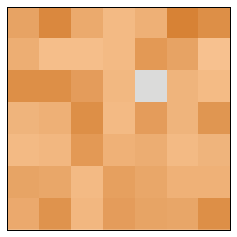

In [53]:
# Testing if random seeds for initial parameters remove some variation
city = TransformingCity(10, random_seed=17)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate(frames=10)
rent_start1 = city.rent_start
rent_end1 = city.rent_current

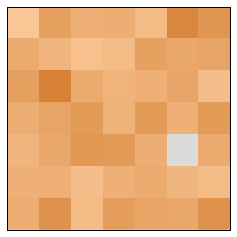

In [54]:
# Testing if random seeds for initial parameters remove some variation
city = TransformingCity(10, random_seed=17)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate(frames=10)
rent_start2 = city.rent_start
rent_end2 = city.rent_current

In [55]:
try:
    np.testing.assert_array_equal(rent_start1, rent_start2)
    print("Rent Initialization is identical for case one and case two")
except AssertionError:
    print("JK")

Rent Initialization is identical for case one and case two


In [56]:
try:
    np.testing.assert_array_equal(rent_end1, rent_end2)
    print("Rent after sim is identical for diff. random seeds?  That can't be right...")
except AssertionError:
    print("Rent after sim is different, which is good!")

Rent after sim is different, which is good!


### Exploring how city size on a 10x10 grid affects creative space

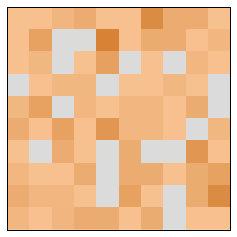

In [58]:
# Testing if random seeds for initial parameters remove some variation
city = TransformingCity(10, start_pop=1000, random_seed=17)
city.step()
city.array = city.pop_count_cr # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate(frames=10)

In [59]:
city.pop_count_cr

array([[ 1.,  1.,  2.,  3.,  1.,  1.,  6.,  3.,  3.,  1.],
       [ 1.,  4.,  0.,  0.,  7.,  1.,  3.,  3.,  1.,  2.],
       [ 1.,  2.,  0.,  1.,  4.,  0.,  1.,  0.,  2.,  1.],
       [ 0.,  1.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.],
       [ 2.,  4.,  0.,  2.,  1.,  2.,  2.,  1.,  3.,  0.],
       [ 3.,  1.,  4.,  1.,  5.,  2.,  2.,  1.,  0.,  2.],
       [ 1.,  0.,  3.,  1.,  0.,  3.,  0.,  0.,  5.,  1.],
       [ 2.,  1.,  1.,  3.,  0.,  3.,  3.,  1.,  3.,  4.],
       [ 3.,  2.,  2.,  1.,  0.,  4.,  1.,  0.,  3.,  6.],
       [ 2.,  1.,  2.,  3.,  3.,  1.,  3.,  0.,  1.,  1.]])

In [60]:
anim

### Exploring questions related to subsidization in a city and affect on creative space

change in % of creative space in unsubsidized city: -2.0 %
change in % of creative space in 50% subsidized city: -6.0 %


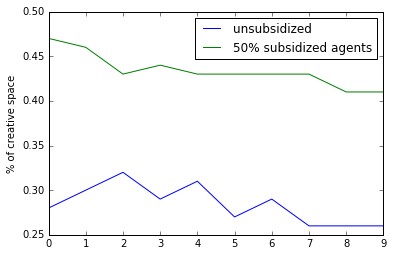

In [48]:
city = TransformingCity(10, random_seed=None)
sub_city = TransformingCity(10, p_subsidized=0.8, avg_rent=10000, random_seed=None)

for i in range(10):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.p_creative_space_history, label='unsubsidized')
plt.plot(sub_city.p_creative_space_history, label='50% subsidized agents')
plt.ylabel('% of creative space')
plt.legend(loc='best')
plt.show()


This visualization got really noisy, and there wasn't a lot of signal whether subsidization or unsubidization would result in more creative space over a number of time steps.
I sometimes noticed an upward trend in both cases though, of more creative spaces in the city.  This can represent a diffusion of creative agents, into areas which have rents which suit them.

In [ ]:
city = TransformingCity(10, avg_rent=12000, random_seed=17)
sub_city = TransformingCity(10, avg_rent=12000, p_subsidized=0.5, random_seed=17)

for i in range(50):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.num_displaced_this_step_history, label='unsubsidized')
plt.plot(sub_city.num_displaced_this_step_history, label='50% subsidized agents')
plt.ylabel('num displaced this step')
plt.legend(loc='best')
plt.show()

After talking with Allen, I'm planning on representing the results of the timeseries with a single number, so that over multiple runs, I can average a single number to find a trend.

### Investigating Creative Space Changes for varying levels of subsidization, over many trials

In [ ]:
def creative_space_subnosub_one_run(p_subsidized):
    city = TransformingCity(10, p_subsidized=p_subsidized, avg_rent=12000, random_seed=17)
    for i in range():
        city.step()
    delta_p_creative_space = city.p_creative_space_history[-1] - city.p_creative_space_history[0]
    return delta_p_creative_space

print("change in % of creative space in 0% subsidized city: {0:.1f} %".format(
        creative_space_subnosub_one_run(0.0) * 100))

In [ ]:
# run your own experiments to get a resmat
sub_levels = 5
p_subsidized_vals = np.linspace(0, 0.90, sub_levels)
n_trials = 1000
resmat = np.zeros((sub_levels, n_trials))
for i, p_subsidized in enumerate(p_subsidized_vals):
    for j in range(n_trials):
        resmat[i,j] = creative_space_subnosub_one_run(p_subsidized)
        

In [ ]:
# preload a resmat
sub_levels = 5
p_subsidized_vals = np.linspace(0, 0.90, sub_levels)
resmat = np.load('resmat_start_rent_12000avgrent_codeversion2_seed17_1000_trials.npy')

In [ ]:
yerr = np.std(resmat, axis=1)
print(yerr)
plt.errorbar(p_subsidized_vals, np.mean(resmat, axis=1), yerr=np.std(resmat, axis=1))
plt.title('mean value over 1000 trials \n with error bars -1 and +1 standard deviation')
plt.xlabel('% of agents subsidized')
plt.ylabel('change in % of creative space')
plt.xlim([-0.1, 1.0])
# plt.tight_layout()
# plt.savefig('p_subsidized_creative_space_errbar_stdev.png', bbox_inches='tight')

In [ ]:
mean = np.mean(resmat, axis=1)
print(mean)
yerr = np.vstack([np.percentile(resmat, 5, axis=1),
                  np.percentile(resmat, 95, axis=1)])
print(yerr)
yerr = yerr - mean[None, :]
print(yerr)
yerr[0,:] *= -1
print(yerr)
plt.errorbar(p_subsidized_vals, mean,
             yerr=yerr)
plt.title('mean value over 1000 trials \n with error bars 5% and 95% percentile')
plt.xlabel('% of agents subsidized')
plt.ylabel('change in % of creative space')
plt.xlim([-0.1, 1.0])
plt.tight_layout()
plt.savefig('p_subsidized_creative_space_errbar_5_95.png', bbox_inches='tight')

In [ ]:
resmat.shape

In [ ]:
np.save('resmat_start_rent_12000avgrent_codeversion2_seed17_1000_trials.npy', resmat)